In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [2]:
# Load your dataset
# Assuming you have a DataFrame named 'data' with features and labels

# Load sample data for demonstration
companies = ['AAPL.csv', 'AMZN.csv', 'CSCO.csv', 'GOOGL.csv', 'INTC.csv', 'AMD.csv', 'MSFT.csv', 'NVDA.csv','KHC.csv', 'KO.csv', 'K.csv', 'KMB.csv', 'CPB.csv', 'GIS.csv', 'MDLZ.csv', 'UL.csv']

data = {}

for file_name in companies:
    data[file_name[:-4]] = pd.read_csv(file_name)

# Create a panel data structure
panel_data = pd.DataFrame()

for company, df in data.items():
    panel_data[f'{company}_Adj_Close'] = df['Adj Close']

# Define variables for war-related events
panel_data.index = pd.to_datetime(panel_data.index)

# Replace the dates with the actual dates of the events
panel_data['War_Onset'] = (panel_data.index >= '2022-01-01') & (panel_data.index <= '2022-02-28')
panel_data['Positive_Event'] = (panel_data.index == '2022-11-11')
panel_data['Negative_Event'] = (panel_data.index == '2022-XX-XX')
# Features (independent variables)
X = panel_data[['War_Onset', 'Positive_Event', 'Negative_Event']]



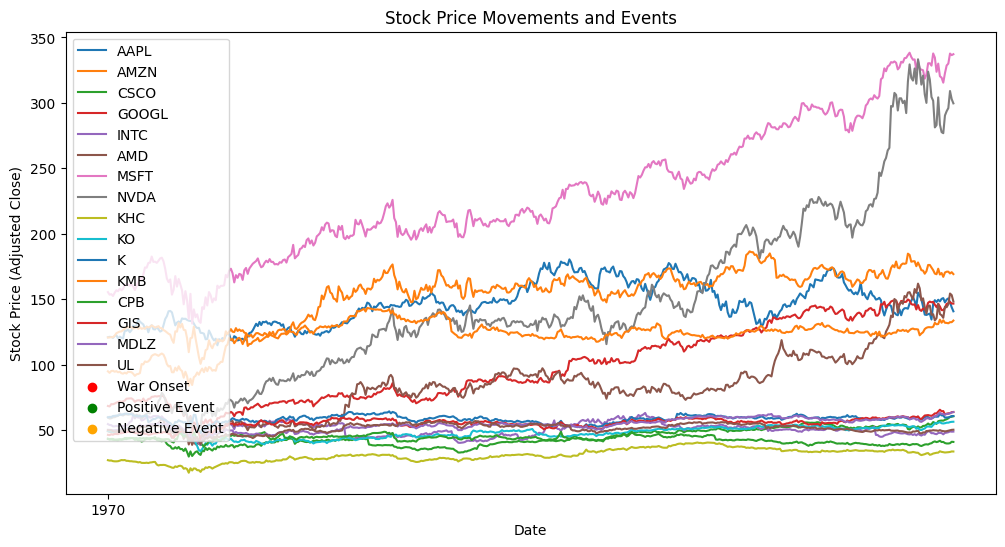

In [3]:

# Step 1: Plot Stock Prices
plt.figure(figsize=(12, 6))

for company in data.keys():
    plt.plot(panel_data.index, panel_data[f'{company}_Adj_Close'], label=f'{company}')

# Step 2: Highlight War Onset
plt.scatter(panel_data.index[panel_data['War_Onset']], panel_data[panel_data['War_Onset']]['AAPL_Adj_Close'], color='red', label='War Onset')

# Step 3: Highlight Positive Events
plt.scatter(panel_data.index[panel_data['Positive_Event']], panel_data[panel_data['Positive_Event']]['AAPL_Adj_Close'], color='green', label='Positive Event')

# Step 4: Highlight Negative Events
plt.scatter(panel_data.index[panel_data['Negative_Event']], panel_data[panel_data['Negative_Event']]['AAPL_Adj_Close'], color='orange', label='Negative Event')

# Step 5: Customize Plot
plt.xlabel('Date')
plt.ylabel('Stock Price (Adjusted Close)')
plt.title('Stock Price Movements and Events')
plt.legend()
plt.show()


In [4]:
# Load your dataset
# Assuming you have a DataFrame named 'data' with features and labels

# Load sample data for demonstration
companies = ['AAPL.csv', 'AMZN.csv', 'CSCO.csv', 'GOOGL.csv', 'INTC.csv', 'AMD.csv', 'MSFT.csv', 'NVDA.csv','KHC.csv', 'KO.csv', 'K.csv', 'KMB.csv', 'CPB.csv', 'GIS.csv', 'MDLZ.csv', 'UL.csv']

# Read the data into 20 different DataFrames
company_dataframes = []
for company_filename in companies:
    company_data = pd.read_csv(company_filename)
    company_dataframes.append(company_data)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

# Assuming you have already loaded the company data into a dictionary named 'company_data'

# Initialize two empty dictionaries
company_models = {}
company_features = {}


data = pd.read_csv('AAPL.csv')

# Store the company data in the dictionary
company_features[company] = data
# Extract features (X) and target variable (y) from the data
X = data[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate different machine learning models
# Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, predictions_lr)
print(f'{company} Linear Regression MSE: {mse_lr}')

# Decision Tree
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
predictions_dt = model_dt.predict(X_test)
mse_dt = mean_squared_error(y_test, predictions_dt)
print(f'{company} Decision Tree MSE: {mse_dt}')

# Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, predictions_rf)
print(f'Random Forest MSE: {mse_rf}')


# Support Vector Machines (SVM)
model_svm = SVR()
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)
mse_svm = mean_squared_error(y_test, predictions_svm)
print(f'SVM MSE: {mse_svm}')

# Ridge Regression
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
predictions_ridge = model_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, predictions_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')

# Lasso Regression
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
predictions_lasso = model_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, predictions_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

# k-Nearest Neighbors (k-NN)
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)
predictions_knn = model_knn.predict(X_test)
mse_knn = mean_squared_error(y_test, predictions_knn)
print(f'k-NN MSE: {mse_knn}')

# Store the trained model for the current company
company_models[company] = model_lr

UL Linear Regression MSE: 0.11529696942279467
UL Decision Tree MSE: 0.20477203904109847
Random Forest MSE: 0.16065950735330042
SVM MSE: 262.1829331986679
Ridge Regression MSE: 0.11522150167826271
Lasso Regression MSE: 0.14559704109246294
k-NN MSE: 309.26966924654744


                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.550e+06
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        04:44:45   Log-Likelihood:                -26203.
No. Observations:               11513   AIC:                         5.242e+04
Df Residuals:                   11507   BIC:                         5.246e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.5159      0.041    -85.265      0.0

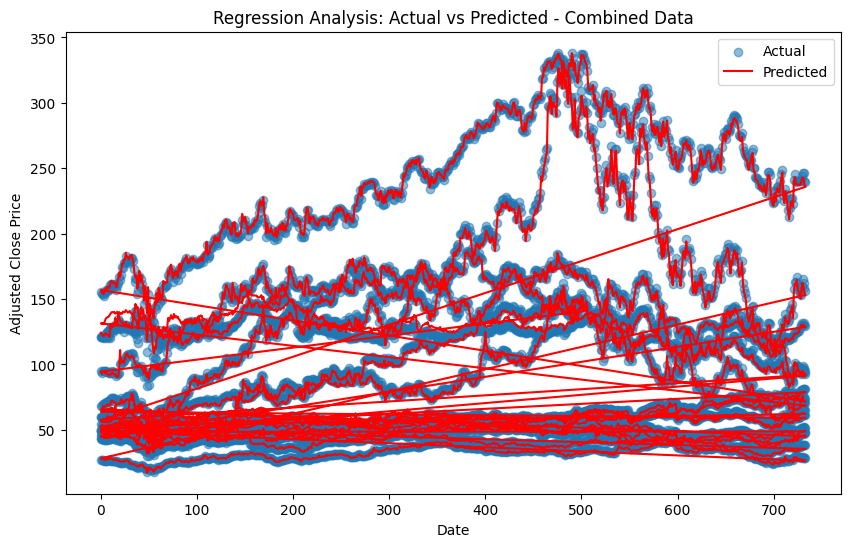

In [6]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# List of company filenames
companies = ['AAPL.csv', 'AMZN.csv', 'CSCO.csv', 'GOOGL.csv', 'INTC.csv', 'AMD.csv', 'MSFT.csv', 'NVDA.csv', 'KHC.csv', 'KO.csv', 'K.csv', 'KMB.csv', 'CPB.csv', 'GIS.csv', 'MDLZ.csv', 'UL.csv']

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each company dataset and combine the data
for company_file in companies:
    data = pd.read_csv(company_file)
    combined_data = pd.concat([combined_data, data[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]], axis=0)

# Add a constant term to the model
X = sm.add_constant(combined_data[['Open', 'High', 'Low', 'Close', 'Volume']])
y = combined_data['Adj Close']

# Perform regression analysis
model = sm.OLS(y, X)
results = model.fit()

# Display the results
print(results.summary())

# Calculate Mean Squared Error
predictions = results.predict(X)
mse = mean_squared_error(y, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(combined_data.index, y, label='Actual', alpha=0.5)
plt.plot(combined_data.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Regression Analysis: Actual vs Predicted - Combined Data')
plt.legend()
plt.show()

Epoch 1/10
260/260 [==============================] - 4s 6ms/step - loss: 11231.4336 - val_loss: 10833.0508
Epoch 2/10
260/260 [==============================] - 1s 3ms/step - loss: 9638.7148 - val_loss: 9278.3760
Epoch 3/10
260/260 [==============================] - 1s 3ms/step - loss: 8274.8525 - val_loss: 7992.5879
Epoch 4/10
260/260 [==============================] - 1s 5ms/step - loss: 7010.2759 - val_loss: 6636.9272
Epoch 5/10
260/260 [==============================] - 2s 7ms/step - loss: 5568.2427 - val_loss: 5176.5083
Epoch 6/10
260/260 [==============================] - 2s 8ms/step - loss: 4367.6948 - val_loss: 4207.1333
Epoch 7/10
260/260 [==============================] - 2s 8ms/step - loss: 3596.6714 - val_loss: 3555.5747
Epoch 8/10
260/260 [==============================] - 2s 6ms/step - loss: 3052.3362 - val_loss: 3064.6228
Epoch 9/10
260/260 [==============================] - 1s 3ms/step - loss: 2634.3130 - val_loss: 2676.2351
Epoch 10/10
72/72 [=========================

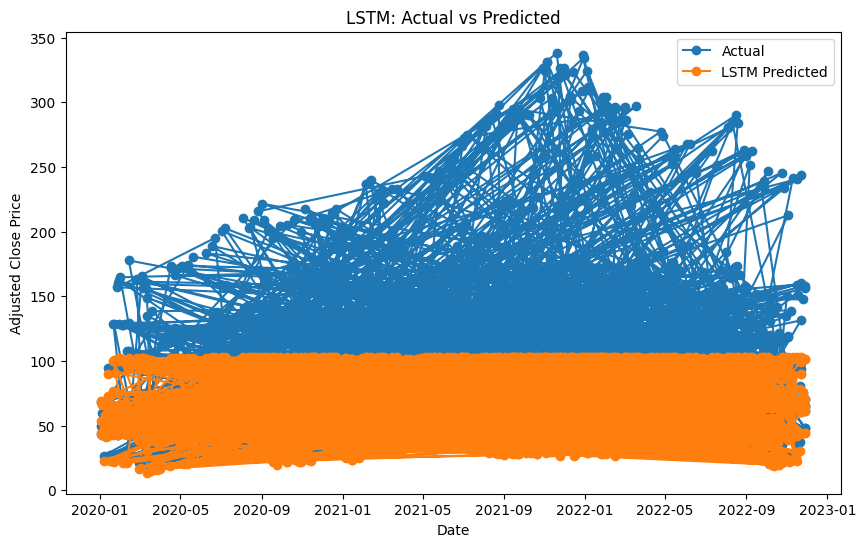

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for LSTM
# LSTM input shape: (batch_size, time_steps, features)
X_reshaped = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(Dense(units=1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Make predictions on the test set
predictions_lstm = lstm_model.predict(X_test)

# Calculate MSE
mse_lstm = mean_squared_error(y_test, predictions_lstm)
print(f'Mean Squared Error (LSTM): {mse_lstm}')
lstm_model.summary()
# Plotting actual vs predicted for LSTM
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, predictions_lstm, label='LSTM Predicted', marker='o')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('LSTM: Actual vs Predicted')
plt.legend()
plt.show()

<ipython-input-9-9e44e13c198d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(company_data)
<ipython-input-9-9e44e13c198d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(company_data)
<ipython-input-9-9e44e13c198d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(company_data)
<ipython-input-9-9e44e13c198d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_data = combined_data.append(company_data)
<ipython-input-9-9e44e13c198d>:23: FutureWarning: The frame.append method is deprecated and will be removed from pan

Mean Squared Error - Gradient Boosting Machine: 2.3231496914454133


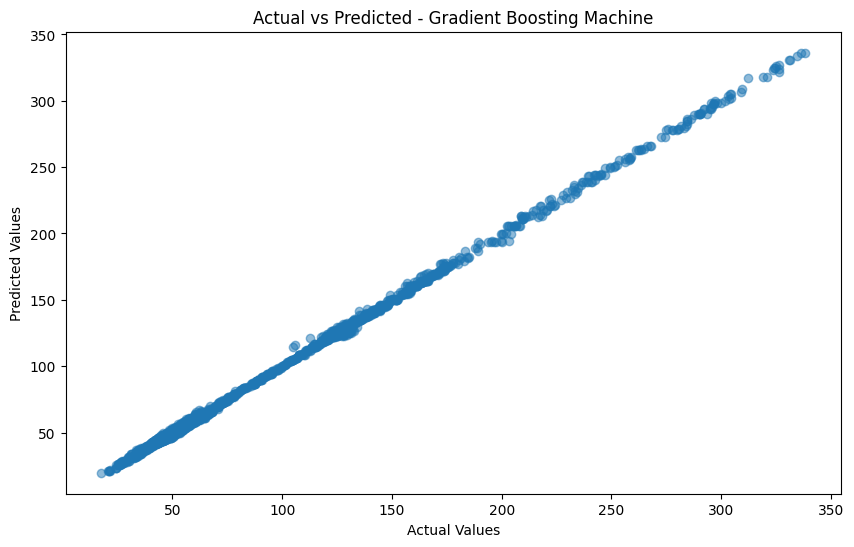

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# List of company filenames
companies = ['AAPL.csv', 'AMZN.csv', 'CSCO.csv', 'GOOGL.csv', 'INTC.csv', 'AMD.csv', 'MSFT.csv', 'NVDA.csv', 'KHC.csv', 'KO.csv', 'K.csv', 'KMB.csv', 'CPB.csv', 'GIS.csv', 'MDLZ.csv', 'UL.csv']

# Initialize an empty DataFrame to store the combined data
combined_data = pd.DataFrame()

# Loop through each company dataset and append to the combined data
for company_file in companies:
    # Load the data for the current company
    company_data = pd.read_csv(company_file)

    # Assuming you have 'Date' as a column in your data, set it as the index
    company_data['Date'] = pd.to_datetime(company_data['Date'])
    company_data.set_index('Date', inplace=True)

    # Append the data to the combined_data DataFrame
    combined_data = combined_data.append(company_data)

# Features (independent variables)
X = combined_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Target variable (dependent variable)
y = combined_data['Adj Close']

# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gbm_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_gbm = gbm_model.predict(X_test)

# Evaluate the model using mean squared error
mse_gbm = mean_squared_error(y_test, predictions_gbm)
print(f'Mean Squared Error - Gradient Boosting Machine: {mse_gbm}')

# Visualize actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions_gbm, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted - Gradient Boosting Machine')
plt.show()


In [10]:
import pandas as pd
import statsmodels.api as sm

companies = ['AAPL', 'AMZN', 'CSCO', 'GOOGL', 'INTC', 'AMD', 'MSFT', 'NVDA', 'KHC', 'KO', 'K', 'KMB', 'CPB', 'GIS', 'MDLZ', 'UL']

# Perform separate regression analyses for each company
for company in companies:
    if f'{company}_Adj_Close' in combined_data.columns:
        y = combined_data[f'{company}_Adj_Close']
        model = sm.OLS(y, X)
        results = model.fit()
        print(f'Results for {company}:\n{results.summary()}\n')


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

from keras.models import Sequential
from keras.layers import LSTM, Dense

data = pd.read_csv('AAPL.csv')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for the same number of samples in X_train and y_train
if len(X_train) != len(y_train):
    raise ValueError("X_train and y_train must have the same number of samples")

# Linear Regression
# Algorithm 1: Short-term stock market price trend prediction

# Recursive Feature Elimination (RFE)

# Convert stock price changes into classes (e.g., positive, negative, neutral)
y_class = pd.cut(y, bins=[float('-inf'), 0, float('inf')], labels=['negative', 'positive'])

# Apply RFE on the transformed labels
classifier_rfe = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(classifier_rfe, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y_class)

# Principal Component Analysis (PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rfe)
# Check and ensure n_components<=min(n_samples,n_features)
pca = PCA(n_components=min(X_scaled.shape[0], X_scaled.shape[1]))
X_pca = pca.fit_transform(X_scaled)


